# Part II - Prosper Loan Data
## by (Yi Jian Ma Ma)

## Investigation Overview

> **In this investigation, I will be examining features of loans dataset that could predict a borrower's APR (main feature of interest for the investigation) (univariate exploration). Additionally, I will also explore how certain variables will interact with each other and how they also might affect the relationship of a Borrower's APR with other features (bivariate and multivariate exploration).

>  In my analysis, the relationships that were explored are "BorrowerAPR" vs "Original Loan Amount" and then investigated whether term/employment status has an effect on that relationship. The variables that were investigated in the dataset were the following:

> <b>Term-</b> The length of the loan expressed in months.

> <b>EmploymentStatus-</b> The employment status of the borrower at the time they posted the listing.

> <b>IsBorrowerHomeowner-</b> A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

> <b>CurrentCreditLines-</b> Number of current credit lines at the time the credit profile was pulled.

> <b>DebtToIncomeRatio -</b> The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001

> <b>StatedMonthlyIncome-</b> The monthly income the borrower stated at the time the listing was created.

> <b>IncomeVerifiable-</b>The borrower indicated they have the required documentation to support their income.

> <b>LoanOriginalAmount-</b>The originiation amount of the loan


## Dataset Overview and Executive Summary

> In the Prosper Loan dataset, there are 113,937 rows of data and 81 columns. However, I ultimately used 97,903 instances of data and 9 columns after cleaning up the dataset and determined the variables that I wanted to explore.

> <b>Findings from Univariate Analysis:</b>

> <b>BorrowerAPR</b> - BorrowerAPR appears to have a bimodal distribution, with the first peak around ~0.2 APR, and then another peak around ~0.35 APR. It also appears that max value for BorrowerAPR is around ~0.42. No transformations were done

> <b>DebtToIncomeRatio</b> - Based on the histogram, there appears to be an outlier for the Debt-to-Income ratio around ~10. I didn't adjust the data, but I created a box-and-whisker plot to identify any potential outliers since there are a lot of ratios that are greater than 1.
 
> <b>Term</b> - There are three types of loan terms: 12 months, 36 months, and 36 months. Majority of loan instances have a 36 month loan term.

> <b>EmploymentStatus</b> - Most people who have a loan are 'employed'. Then followed by 'Full-time'. However, those who are 'Full-time' and 'Part-Time' can technically be considered as 'Employed'. For the most part, people who are approved of loans have a job. People who are retired or have part-time make a small fraction of people who were approved of a loan. Although I didn't adjust the data, I would have have combined the "Full-Time", "Part-Time" under the "Employed" category

> <b>CurrentCreditLines</b> - The distribution for currrent credit lines appear to be unimodal, right-skewed. Most people with loans seem to have close to 10 credit lines

> <b>IncomeVerifiable</b> - Most people with a loan were able to have their income verified. A small portion of people with a Prosper loan did not have their income verified.

> <b>LoanOriginalAmount</b>Based on the histogram, it seems loan original amount has a multi-modal distribution, with multiple loans in the following categories: 5000, 10000, 15000, 20000, 25000, and 35000.

> <b>Findings from Bivariate Analysis:</b>

> Overall, BorrowerAPR doesn't seem to have a strong correlation with many of the numerical variables as all of the correlation values are less than 0.5 (positive correlation) and greater than -0.5 (negative correlation). In order for the variables to have strong correlation, the R value should be close to either 1 or -1, but it doesn't seem like that is the case based on the heatmap. Additionally, based on the heatmap, there is a small negative correlation between BorrowerAPR and LoanOriginalAmount. As the original loan amount increases, BorrowerAPR decreases. The heatmap also indicate a small positive relationship between LoanOriginalAmount and StatedMonthlyIncome. This makes some sense as the monthly income of a borrwer increases, they can also have a bigger loan amount. StatedMonthlyIncome and DebtToIncomeRatio also has a negative correlation, however it is a very small negative correlation (-0.13). As StatedMonthlyIncome increases, the debt-to-income ratio decreases. Further analysis will need to be conducted to determine whether the correlation is significant.
> 
> <b>CurrentCreditLines - </b> Based on the scatterplot, it apperas there is no correlation between BorrowerAPR and the number of current credit lines. This is because a lot of the points regardless of the number of credit lines, the borrowerAPR varies across the y-axis.For example, when CurrentCreditLines is 10, a lot of the points fall between where BorrowerApr is betwee 0.15 to 0.40. 

> <b>Stated Monthly Income - </b> Based on the scatterplot, it is hard to conclude there is a relationship/correlation between BorrowerAPR and the stated monthly income. This is because of outliers for large stated monthly income impacted the axis. I will create a heatmap with correlation values later on to investigate further into this.

> <b>Loan Original Amount- </b> Based on the scatterplot, it appears there is a slight negative correlation between BorrowerAPR and the loan original amount. When loanOrigianl amount is between 0-25000, borrowerAPR varies across the y-axis. However, when LoanOriginalAmount is between 25000-35000, the negative relationship is somewhat more visible. As the LoanOriginalAmount increases, BorrowerAPR increases. But this seems to go against the negative trendline. I will create a heatmap with correlation values to investigate further into this as well.

> <b>Debt To Income Ratio- </b> Based on the scatterplot, there is a positive trendline between DebtToIncomeRatio and BorrowerAPR. However because a lot of the ratio points are less than ~2, the big-outlier of DebtToIncomeRatio=10 significantly impacted the scatterplot. It may be worth to remove outliers from the DebtToIncomeRatio and plot a new scatterplot between BorrowerAPR and DebtToIncomeRatio


> <b>Findings from Multivariate Analysis:</b>

> Term doesn't seem to strengthen the relationship of other features and the feature of interest (BorrowerAPR).
> Employment Status - Seems to play an impact in the relationship of other feature and the feature of interest (BorrowerAPR) as seen in the FacetPlot. Employment status appears to have a slight impact on the relationship between the original loan amount and BorrowerAPR. However, the effect seems to be small. Further testing will be needed to determine whether the effect is significant or not. 
> An interesting interaction between features is that EmploymentStatus on an BorrowerAPR and the original loan amount. Especially when Employment status is 'other', there seems to be a slight positive correlation between BorrowerAPR and the original loan amount. By understanding what "Other" consists of in the employment status category will be interesting and why it produces a positive relationship, whereas all other Employment status displayed a negative correlation.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# Load data
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# Create subset of data baxed on the features(s) of interest identified above
subset_df = df[['BorrowerAPR','Term','EmploymentStatus','IsBorrowerHomeowner','CurrentCreditLines','DebtToIncomeRatio',
'StatedMonthlyIncome','IncomeVerifiable','TotalProsperLoans','LoanOriginalAmount']]
subset_df.head()

#Remove 'TotalProsperLoan' feature since roughly 80% of values are missing
subset_df.drop(columns=['TotalProsperLoans'], inplace=True)
subset_df.head()

# Remove missing value rows from BorrowerAPR column as this is the main feature in our analysis
subset_df.dropna(subset=['BorrowerAPR'], inplace=True)

# Remove missing value rows from DebtToIncomeRatio column. Don't want to fill it in with 0 or the mean since there are different implications whether it is 0 or mean value
subset_df.dropna(subset=['DebtToIncomeRatio'], inplace=True)

# Remove missing value rows from CurrentCreditLines column. Don't want to fill it in with 0 or the mean since there are different implications whether it is 0 or mean value
subset_df.dropna(subset=['CurrentCreditLines'], inplace=True)

# Convert 'Term' and 'EmploymentStatus' into categorical variables
subset_df['Term'] = subset_df['Term'].astype('category')
subset_df['EmploymentStatus'] = subset_df['EmploymentStatus'].astype('category') 

# To explore the variables, create a defintion for creating histogram plots as part of univariate variable exploration
def histogram_plot(xvar, xlabelname, ylabelname, titlename, dataframe):
    df_plot = plt.hist(data=dataframe, x=xvar, bins=bins)
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.title(titlename);
    return df_plot

## Borrower APR Distribution

<b>Observation:</b> BorrowerAPR appears to have a bimodal distribution, with the first peak around ~0.2 APR, and then another peak around ~0.35 APR. It also appears that max value for BorrowerAPR is around ~0.42.

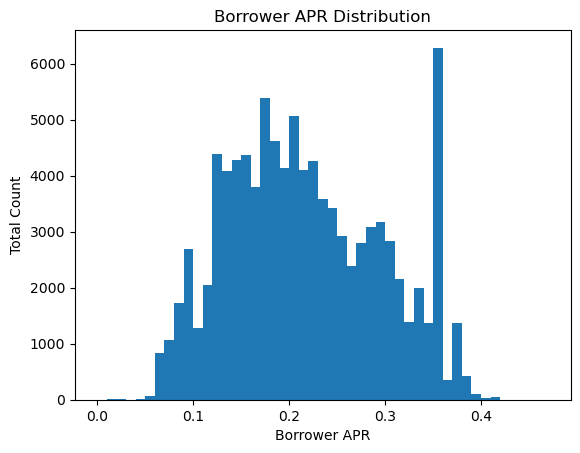

In [10]:
# Create histogram for 'BorrowerAPR' to show the counts distribution of where most APRs fall
bins = np.arange(0, subset_df['BorrowerAPR'].max()+0.05, 0.01)
histogram_plot('BorrowerAPR', 'Borrower APR', 'Total Count', 'Borrower APR Distribution',subset_df);

## Heatmap for Numerical Features

<b>Observation:</b> Overall, BorrowerAPR doesn't seem to have a strong correlation with many of the numerical variables as all of the correlation values are less than 0.5 (positive correlation) and greater than -0.5 (negative correlation). In order for the variables to have strong correlation, the R value should be close to either 1 or -1, but it doesn't seem like that is the case based on the heatmap. Additionally, based on the heatmap, there is a small negative correlation between BorrowerAPR and LoanOriginalAmount. As the original loan amount increases, BorrowerAPR decreases. The heatmap also indicate a small positive relationship between LoanOriginalAmount and StatedMonthlyIncome. This makes some sense as the monthly income of a borrwer increases, they can also have a bigger loan amount. StatedMonthlyIncome and DebtToIncomeRatio also has a negative correlation, however it is a very small negative correlation (-0.13). As StatedMonthlyIncome increases, the debt-to-income ratio decreases. Further analysis will need to be conducted to determine whether the correlation is significant. 

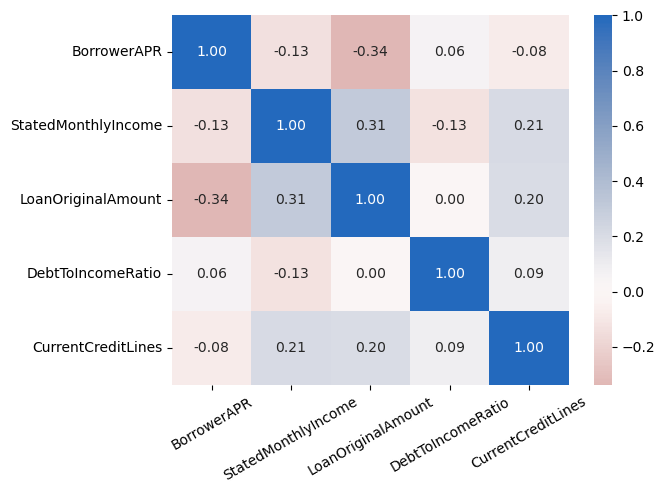

In [13]:
# List of numerical values to focus on for the analysis
num_variables = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio','CurrentCreditLines']

# Create heatmap based on the numerical variables
sns.heatmap(subset_df[num_variables].corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0);
plt.xticks(rotation = 30);

## Facet Plot

<b>Observation: </b>Based on the facet plot, employment status apperas to have some effect on the relationship between LoanOriginalAmount and BorrowerAPR. However, the relationship doesn't seem to be significant. There is a negative relationship where employment status is employed, full-time, other, part-time, retired, and self-employed (strong negative relationship for employed, full-time, and other). There is a slight positive relationship when employment status is 'not-employed'. 

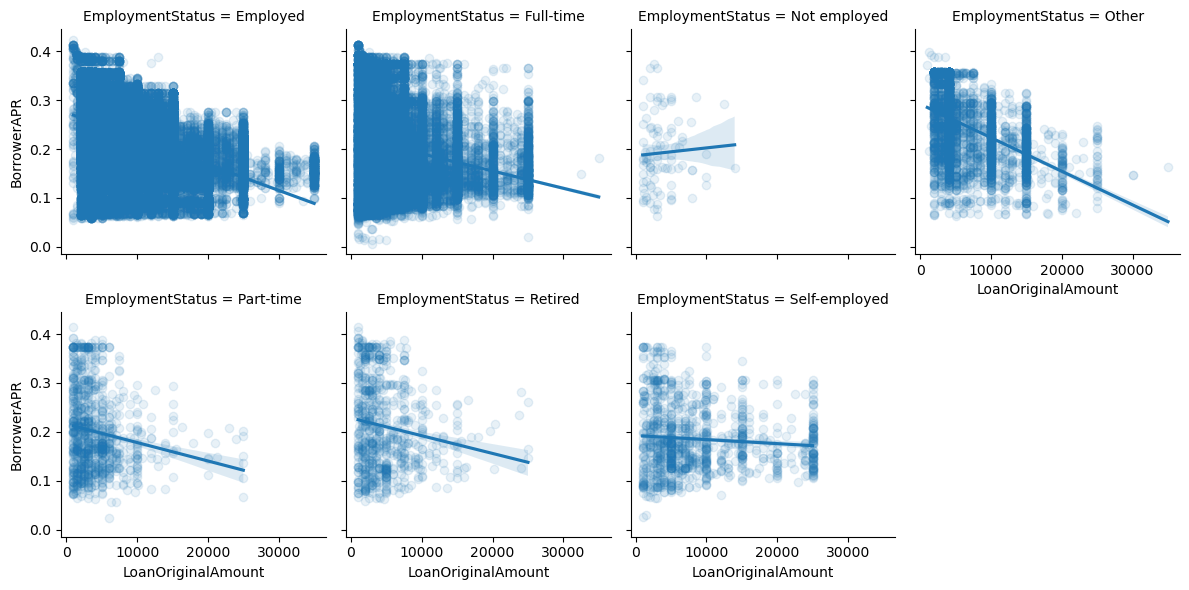

In [16]:
# Create facet plot for Employment Status and see if it has an effect on BorrowerAPR and Original Loan Amount
facet_plot = sns.FacetGrid(data = subset_df, col = 'EmploymentStatus', col_wrap = 4)
facet_plot.map(sns.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = .05, scatter_kws = {'alpha': 0.1});

## Box and Whisker Plot Matrix

<b>Observation: </b> From the box-and-whisker plot, it appears that 'Term' doesn't seem to have an effect on the relationship between Employment Status and BorrowerAPR. From the all plots, the median BorrowerAPR seems to be close to 0.2 regardless of the term length. 

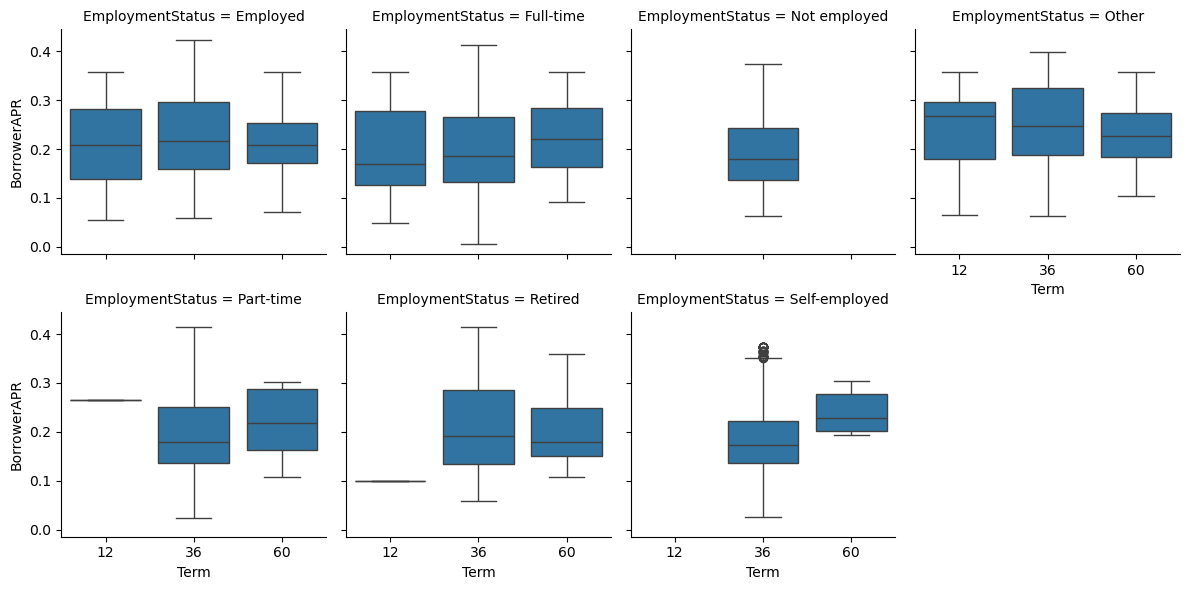

In [18]:
# Create box and whisker matrix 
g = sns.FacetGrid(data=subset_df, col='EmploymentStatus', col_wrap = 4)
g.map(sns.boxplot, 'Term', 'BorrowerAPR' );

In [21]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_2_Data_Explanatory.ipynb

[NbConvertApp] Converting notebook Part_2_Data_Explanatory.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 768488 bytes to Part_2_Data_Explanatory.html
